In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mat
import matplotlib.image as mpimg
import numpy as np
import shutil

import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import shuffle
import torch
from torch.utils.data import DataLoader 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from IPython.core.display import display, HTML

8000


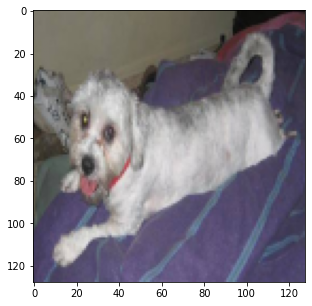

[0]


In [2]:
def show_img(open_cv_image):

    plt.figure(figsize=(5,5))
    plt.imshow(open_cv_image)
    plt.show()
class DatasetForClassify_01:
    def __init__(self,dir_name,flag):
        self.dir_name = dir_name
        self.dir_name_1 = dir_name
        self.flag = flag # 1 - показывать фотографии, 0 - не показывать
        
        
        folder_struct=self.folder2struct(dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
        
    def adddir(self,dir_name ):
        self.dir_name_1 = dir_name
        
    def reinit_0(self  ):
        
        folder_struct=self.folder2struct(self.dir_name_1)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
    def reinit_1(self  ):
        
        folder_struct=self.folder2struct(self.dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']


    def folder2struct(self,dir_name):
        folder = []
        for folder_ in os.listdir( dir_name):
            folder.append(dir_name+folder_+ '/')
        
        indexes=np.array(range(len(folder)))
        ind_all=[]
        w_array=[]
        for i in indexes:
                   
            files_i = self.photo_shuffle(str(folder[i ]))
            ind_all.append(np.array(files_i))
            w_array.append(len(files_i))
        ind_all=np.array(ind_all)
        w_array=np.array(w_array)        
        l_=sum(w_array)
        folder_struct = {'folder':folder,'w_array':w_array,'l_' : l_,'ind_all' : ind_all}
        return folder_struct

        
        
    def __len__(self):
        
         
        return min(10000,self.l_)


    #Создание списка с фото+шаффл
    def photo_shuffle(self,folder_ ):
        files = []
        for file in os.listdir(folder_   + '/'):
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                files.append(file)
        shuffle(files)
        #print(self.folder[number])
        return files
    def downscale_2(self,img):
        img = img.astype(np.uint16)
        img = img[:, 0::2] + img[:, 1::2]
        img = img[0::2, :] + img[1::2, :]
        img >>= 2
        return img.astype(np.float)    
    #Ресайзинг
    def resize(self,pimage):
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
        try: 
            bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
            if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :

                resize_image = self.downscale_2(bw_)
                #resize_image =  bw_ 
            else:
                resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)


            return resize_image

        except:
            print(pimage)
            return None
            
    
    def random_sample_file(self ):
        i_folder=random.sample(range(len(self.folder)), 1)
        #print('i_folder',i_folder[0])
        i_file=random.sample(range( self.w_array[i_folder[0]]), 1)
        #print('i_file',i_file[0])
        #print('self.folder[i_folder[0]]',self.folder[i_folder[0]])
        file_temp=self.folder[i_folder[0]]+self.ind_all[i_folder[0]][i_file[0]]
        return i_folder,file_temp

    def __getitem__(self,idx):

        i_folder,file_temp=self.random_sample_file()
         
            
        anchor = self.resize(file_temp)
        if anchor is not None:
        

            return {'Anchor':anchor/255,


                   'label': np.array([i_folder[0]])}
        else:
            return{'Anchor':np.random.rand(128,128,3),


                   'label': np.array([1])}
###################################################
dataset1 =DatasetForClassify_01('dataset/training_set/',0) 
dataloader = DataLoader(dataset1, batch_size=3)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
show_img(Anchor[:,:,:])
 
label_=batch['label'][0].numpy()  
print(label_)


# Импорт Модели RESNET

In [18]:
from zz.models.ResNet import TL_003_mehanit_onnx
IMAGE_SIZE = [128, 128, 3] 
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cuda',numclasses=670 ,show=0)
TL_001.compile(criterion='000', optimizer='adam', lr=0.0001, momentum=0.5) 
#TL_001.load_state('TL_01.pt')
TL_001.load_state('weights/cat_dogs_Resnet.pt')      
TL_001.eval()
TL_001.summary() 


Loading preset weights... Ok.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Lambda-1          [-1, 1, 128, 128]               0
     Normalization-2          [-1, 3, 128, 128]               0
            Conv2d-3           [-1, 64, 64, 64]           9,408
       BatchNorm2d-4           [-1, 64, 64, 64]             128
              ReLU-5           [-1, 64, 64, 64]               0
         MaxPool2d-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]           8,192
       BatchNorm2d-8          [-1, 128, 32, 32]             256
              ReLU-9          [-1, 128, 32, 32]               0
           Conv2d-10          [-1, 128, 32, 32]         147,456
      BatchNorm2d-11          [-1, 128, 32, 32]             256
             ReLU-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]          32,768
      Ba

# Импорт Модели MOBILENET

In [23]:
from zz.models.MobileNetV3 import TL_003_mehanit_onnx
IMAGE_SIZE = [128, 128, 3] 
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cuda',numclasses=670 ,show=0)
TL_001.compile(criterion='000', optimizer='adam', lr=0.0001, momentum=0.5) 
#TL_001.load_state('TL_01.pt')
TL_001.load_state('weights/cat_dogs_mobileNet.pt')      
TL_001.eval()
TL_001.summary() 


Loading preset weights... Ok.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Lambda-1          [-1, 1, 128, 128]               0
     Normalization-2          [-1, 3, 128, 128]               0
            Conv2d-3           [-1, 16, 64, 64]             432
       BatchNorm2d-4           [-1, 16, 64, 64]              32
         Hardswish-5           [-1, 16, 64, 64]               0
            Conv2d-6           [-1, 16, 64, 64]             144
       BatchNorm2d-7           [-1, 16, 64, 64]              32
              ReLU-8           [-1, 16, 64, 64]               0
            Conv2d-9           [-1, 16, 64, 64]             256
      BatchNorm2d-10           [-1, 16, 64, 64]              32
         Identity-11           [-1, 16, 64, 64]               0
 InvertedResidual-12           [-1, 16, 64, 64]               0
           Conv2d-13           [-1, 64, 64, 64]           1,024
      Ba

# Импорт Модели VGG

In [8]:
from zz.models.VGG import TL_003_mehanit_onnx
IMAGE_SIZE = [128, 128, 3] 
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cuda',numclasses=670 ,show=0)
TL_001.compile(criterion='000', optimizer='adam', lr=0.0001, momentum=0.5) 
#TL_001.load_state('TL_01.pt')
TL_001.load_state('weights/cat_dogs_VGG.pt')      
TL_001.eval()
TL_001.summary() 


Loading preset weights... Ok.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Lambda-1          [-1, 1, 128, 128]               0
     Normalization-2          [-1, 3, 128, 128]               0
            Conv2d-3         [-1, 64, 128, 128]           1,792
              ReLU-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          36,928
              ReLU-6         [-1, 64, 128, 128]               0
         MaxPool2d-7           [-1, 64, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]          73,856
              ReLU-9          [-1, 128, 64, 64]               0
           Conv2d-10          [-1, 128, 64, 64]         147,584
             ReLU-11          [-1, 128, 64, 64]               0
        MaxPool2d-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]         295,168
        

# test

2000


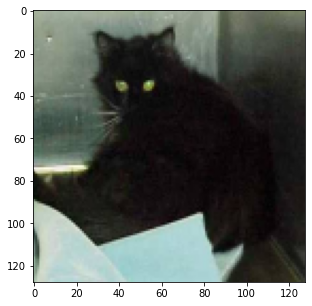

[1]
[[0.01435908]]


In [24]:
dataset1 =DatasetForClassify_01('dataset/test_set/',0) 
dataloader = DataLoader(dataset1, batch_size=5)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
show_img(Anchor[:,:,:])
 
label_=batch['label'][0].numpy()  
print(label_)
predict=TL_001(np.expand_dims(Anchor,0))
print(predict)

# График метрики

2000


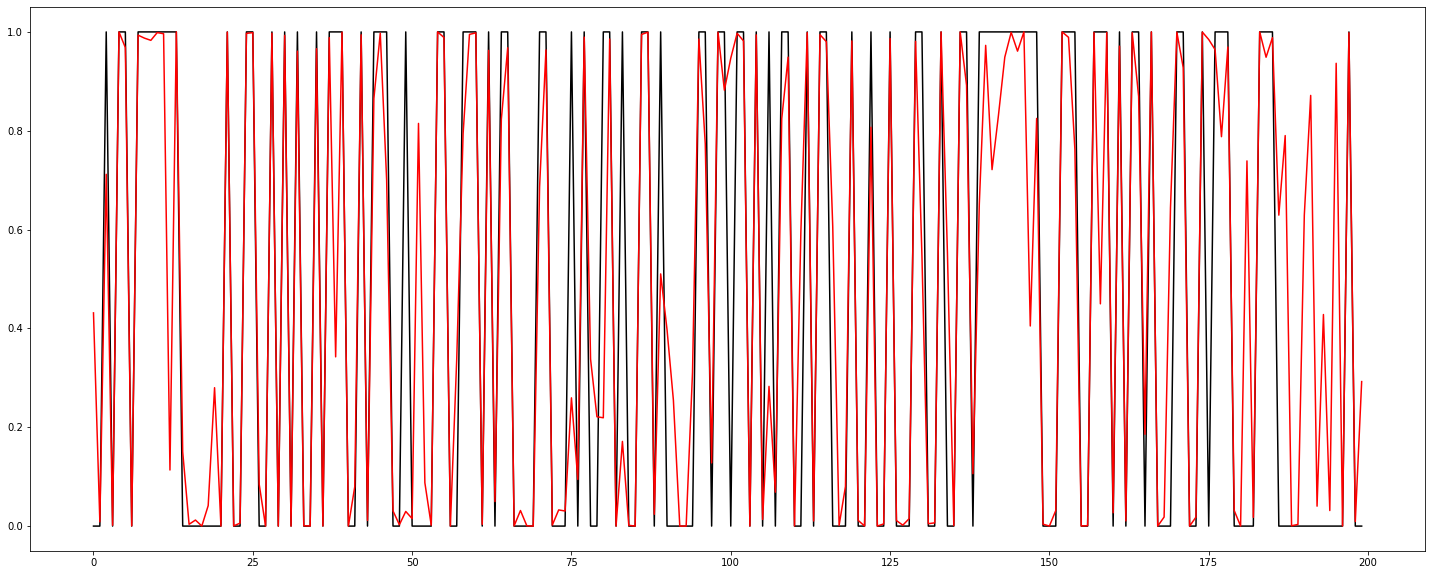

[[0.90425532 0.09574468]
 [0.12264151 0.87735849]]


In [25]:
def plot_im_2(img,img2):
     
    plt.figure(figsize=(25,10))

    plt.plot(img.ravel() ,'k')
    plt.plot(img2.ravel() ,'r')
     
    plt.show()  

dataset1 =DatasetForClassify_01('dataset/test_set/',0) 
dataloader = DataLoader(dataset1, batch_size=200)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'].numpy() 
predict=TL_001(Anchor)  
label_=batch['label'].numpy()  
plot_im_2(label_,1-predict)

i_true_positive=np.where(label_>0.5)[0]
i_true_negative=np.where(label_<0.5)[0]
i_predict_positive=np.where(predict<0.5)[0]
i_predict_negative=np.where(predict>0.5)[0]

true_positive=len(set(i_true_positive)&(set(i_predict_positive)))/len(i_true_positive)
true_negative=len(set(i_true_negative)&(set(i_predict_negative)))/len(i_true_negative)
CFG_mtrx=np.array([[true_positive,1-true_positive],[1-true_negative,true_negative]])
print(CFG_mtrx)

In [17]:
VGG [[0.95876289 0.04123711] [0.00970874 0.99029126]]
RESNET [[0.80555556 0.19444444] [0.01086957 0.98913043]]
Mobilenet [[0.90425532 0.09574468] [0.12264151 0.87735849]]

SyntaxError: invalid syntax (<ipython-input-17-85893acfbe2f>, line 1)

# DOGS

In [14]:
dir_in='dataset/test_set/dogs'
dir_out='dataset/incoming/dogs'
if not os.path.exists(dir_out):
        os.makedirs(dir_out)

def file2tenzor(pimage):
         
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
        try: 
            bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
            if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :

                resize_image = self.downscale_2(bw_)
                #resize_image =  bw_ 
            else:
                resize_image = cv2.resize(bw_, (IMAGE_SIZE[0],IMAGE_SIZE[1]), interpolation = cv2.INTER_AREA)


            return resize_image/255

        except:
            print(pimage)
            return None
##########################################
q=os.listdir(dir_in)
l_=len(q)        
if len(q)>20:
     for file in q:        
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            tensor_=file2tenzor(os.path.join(dir_in, file))
            if tensor_ is not None:
                predict=TL_001(np.expand_dims(tensor_,0))
                print('predict:',predict[0,0])
                if predict[0,0] > 0.5:
                    #show_img(tensor_)
                    shutil.copy( os.path.join(dir_in, file) , os.path.join(dir_out, file))
                    print(file)

predict: 0.9999248
dog.4303.jpg
predict: 0.9860519
dog.4439.jpg
predict: 0.9999988
dog.4903.jpg
predict: 0.9999982
dog.4697.jpg
predict: 0.99999917
dog.4357.jpg
predict: 0.9999795
dog.4912.jpg
predict: 0.9999994
dog.4458.jpg
predict: 1.0
dog.4341.jpg
predict: 0.9999081
dog.4524.jpg
predict: 0.9999999
dog.4802.jpg
predict: 0.99998
dog.4681.jpg
predict: 1.0
dog.4918.jpg
predict: 0.99999976
dog.4411.jpg
predict: 0.999998
dog.4099.jpg
predict: 1.0
dog.4511.jpg
predict: 0.9999901
dog.4430.jpg
predict: 1.0
dog.4379.jpg
predict: 0.99994826
dog.4639.jpg
predict: 0.99998415
dog.4501.jpg
predict: 1.0
dog.4702.jpg
predict: 1.0
dog.4946.jpg
predict: 0.99999416
dog.4248.jpg
predict: 1.0
dog.4807.jpg
predict: 0.99999356
dog.4466.jpg
predict: 0.9999914
dog.4764.jpg
predict: 1.0
dog.4083.jpg
predict: 0.9999225
dog.4955.jpg
predict: 0.0028975534
predict: 1.0
dog.4576.jpg
predict: 0.99994767
dog.4150.jpg
predict: 0.9999999
dog.4023.jpg
predict: 0.99999964
dog.4564.jpg
predict: 6.1598803e-06
predict: 0.9

predict: 0.9999943
dog.4313.jpg
predict: 0.35972875
predict: 0.99999535
dog.4448.jpg
predict: 0.9999999
dog.4498.jpg
predict: 1.0
dog.4124.jpg
predict: 0.99998665
dog.4780.jpg
predict: 1.0
dog.4532.jpg
predict: 0.9999776
dog.4575.jpg
predict: 0.9999902
dog.4538.jpg
predict: 0.9999999
dog.4756.jpg
predict: 0.9998927
dog.4929.jpg
predict: 0.99998283
dog.4019.jpg
predict: 1.0
dog.4723.jpg
predict: 1.0
dog.4562.jpg
predict: 0.99999905
dog.4732.jpg
predict: 0.99998105
dog.4813.jpg
predict: 2.2749151e-05
predict: 0.9999014
dog.4542.jpg
predict: 1.0
dog.4829.jpg
predict: 0.9999989
dog.4279.jpg
predict: 1.0
dog.4533.jpg
predict: 1.0
dog.4668.jpg
predict: 0.9999939
dog.4345.jpg
predict: 4.0295413e-06
predict: 0.00093291944
predict: 0.9999645
dog.4940.jpg
predict: 0.9999995
dog.4321.jpg
predict: 0.9999951
dog.4536.jpg
predict: 0.99999297
dog.4602.jpg
predict: 0.11399896
predict: 0.00018928197
predict: 0.9999981
dog.4818.jpg
predict: 0.9999994
dog.4428.jpg
predict: 0.999949
dog.4197.jpg
predict: 

predict: 0.99999833
dog.4276.jpg
predict: 0.99999607
dog.4894.jpg
predict: 0.9999714
dog.4016.jpg
predict: 0.9999993
dog.4046.jpg
predict: 0.2718892
predict: 0.00037567597
predict: 0.999652
dog.4953.jpg
predict: 0.99998605
dog.4619.jpg
predict: 0.6187059
dog.4432.jpg
predict: 0.99999213
dog.4868.jpg
predict: 0.9999671
dog.4546.jpg
predict: 0.99996495
dog.4032.jpg
predict: 1.0
dog.4465.jpg
predict: 0.99996424
dog.4825.jpg
predict: 0.99998534
dog.4654.jpg
predict: 1.0
dog.4492.jpg
predict: 1.0
dog.4287.jpg
predict: 0.9999982
dog.4014.jpg
predict: 0.9999995
dog.4629.jpg
predict: 0.99999964
dog.4863.jpg
predict: 1.0
dog.4677.jpg
predict: 1.0
dog.4480.jpg
predict: 0.9999418
dog.4837.jpg
predict: 0.99999976
dog.4906.jpg
predict: 0.99999976
dog.4638.jpg
predict: 0.99999976
dog.4250.jpg
predict: 1.0
dog.4746.jpg
predict: 0.9999951
dog.4410.jpg
predict: 1.0
dog.4070.jpg
predict: 0.9999994
dog.4369.jpg
predict: 0.9999845
dog.4561.jpg
predict: 0.99999976
dog.4183.jpg
predict: 1.0
dog.4199.jpg
pre

predict: 0.99996805
dog.4842.jpg
predict: 0.99995077
dog.4647.jpg
predict: 0.9999794
dog.4665.jpg
predict: 0.9999629
dog.4728.jpg
predict: 0.99999976
dog.4226.jpg
predict: 0.99999917
dog.4611.jpg
predict: 0.99999785
dog.4643.jpg
predict: 0.99999976
dog.4983.jpg
predict: 0.99993205
dog.4503.jpg
predict: 0.99999285
dog.4090.jpg
predict: 0.07953426
predict: 1.0
dog.4747.jpg
predict: 1.0
dog.4965.jpg
predict: 1.0
dog.4520.jpg
predict: 0.9999888
dog.4038.jpg
predict: 0.99998844
dog.4296.jpg
predict: 0.9999728
dog.4280.jpg
predict: 0.9999845
dog.4757.jpg
predict: 0.9999995
dog.4733.jpg
predict: 0.99999964
dog.4803.jpg
predict: 0.99999917
dog.4980.jpg
predict: 1.0
dog.4461.jpg
predict: 1.0
dog.4922.jpg
predict: 0.9999981
dog.4712.jpg
predict: 0.9999999
dog.4221.jpg
predict: 0.9999989
dog.4535.jpg
predict: 0.99997795
dog.4056.jpg
predict: 0.9999999
dog.4487.jpg
predict: 0.109326415
predict: 1.0
dog.4265.jpg
predict: 0.9999999
dog.4960.jpg
predict: 1.0
dog.4239.jpg
predict: 0.0043331683
predict

# CATS

In [15]:
dir_in='dataset/test_set/cats'
dir_out='dataset/incoming/cats'
if not os.path.exists(dir_out):
        os.makedirs(dir_out)

def file2tenzor(pimage):
         
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
        try: 
            bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
            if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :

                resize_image = self.downscale_2(bw_)
                #resize_image =  bw_ 
            else:
                resize_image = cv2.resize(bw_, (IMAGE_SIZE[0],IMAGE_SIZE[1]), interpolation = cv2.INTER_AREA)


            return resize_image/255

        except:
            print(pimage)
            return None
##########################################
q=os.listdir(dir_in)
l_=len(q)        
if len(q)>20:
     for file in q:        
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            tensor_=file2tenzor(os.path.join(dir_in, file))
            if tensor_ is not None:
                predict=TL_001(np.expand_dims(tensor_,0))
                print('predict:',predict[0,0])
                if predict[0,0] <0.5:
                    #show_img(tensor_)
                    shutil.copy( os.path.join(dir_in, file) , os.path.join(dir_out, file) )
                    print(file)

predict: 1.1451524e-06
cat.4409.jpg
predict: 1.2182158e-05
cat.4506.jpg
predict: 2.9835576e-06
cat.4809.jpg
predict: 2.1093545e-05
cat.4321.jpg
predict: 0.0005749398
cat.4375.jpg
predict: 5.026029e-06
cat.4223.jpg
predict: 0.00024279262
cat.4395.jpg
predict: 9.2803106e-07
cat.4195.jpg
predict: 0.00027668313
cat.4505.jpg
predict: 0.0005770975
cat.4702.jpg
predict: 1.01218355e-07
cat.4940.jpg
predict: 0.011401822
cat.4988.jpg
predict: 3.6247347e-05
cat.4575.jpg
predict: 0.0005012187
cat.4635.jpg
predict: 1.2703647e-06
cat.4245.jpg
predict: 6.793687e-05
cat.4403.jpg
predict: 8.0497404e-05
cat.4492.jpg
predict: 2.7293625e-08
cat.4062.jpg
predict: 0.0075993934
cat.4313.jpg
predict: 0.9999974
predict: 4.0960426e-06
cat.4351.jpg
predict: 0.00037776356
cat.4249.jpg
predict: 7.5681106e-07
cat.4825.jpg
predict: 1.1001969e-06
cat.4829.jpg
predict: 8.067982e-06
cat.4963.jpg
predict: 1.0
predict: 7.713853e-07
cat.4738.jpg
predict: 1.3606812e-05
cat.4742.jpg
predict: 0.00028248588
cat.4089.jpg
predi

predict: 0.0001995479
cat.4457.jpg
predict: 1.606182e-07
cat.4463.jpg
predict: 0.0011749364
cat.4722.jpg
predict: 0.0001844457
cat.4521.jpg
predict: 4.0994948e-07
cat.4270.jpg
predict: 6.319104e-05
cat.4434.jpg
predict: 7.2280045e-07
cat.4003.jpg
predict: 5.6621077e-09
cat.4170.jpg
predict: 0.0001436578
cat.4536.jpg
predict: 1.0086333e-05
cat.4806.jpg
predict: 0.0010936543
cat.4715.jpg
predict: 4.7085152e-05
cat.4560.jpg
predict: 1.612435e-05
cat.4283.jpg
predict: 1.5111911e-07
cat.4267.jpg
predict: 1.05878994e-08
cat.4376.jpg
predict: 1.3805559e-06
cat.4564.jpg
predict: 0.000119928845
cat.4047.jpg
predict: 1.6836317e-07
cat.4263.jpg
predict: 0.00045577402
cat.4073.jpg
predict: 4.498599e-06
cat.4307.jpg
predict: 0.011705994
cat.4394.jpg
predict: 2.017139e-07
cat.4390.jpg
predict: 0.99999666
predict: 1.6467367e-06
cat.4294.jpg
predict: 1.8507992e-08
cat.4255.jpg
predict: 3.462762e-06
cat.4009.jpg
predict: 9.251255e-06
cat.4305.jpg
predict: 1.7131246e-05
cat.4331.jpg
predict: 5.2242044e-

predict: 0.00171832
cat.4314.jpg
predict: 6.151112e-08
cat.4658.jpg
predict: 0.0004607238
cat.4018.jpg
predict: 8.608908e-06
cat.4604.jpg
predict: 0.0020187986
cat.4441.jpg
predict: 0.0013820068
cat.4508.jpg
predict: 1.9731776e-06
cat.4689.jpg
predict: 1.9703516e-06
cat.4589.jpg
predict: 0.9999932
predict: 0.99997175
predict: 9.264595e-06
cat.4141.jpg
predict: 3.2067373e-06
cat.4820.jpg
predict: 4.701077e-09
cat.4488.jpg
predict: 0.999998
predict: 0.00024719894
cat.4561.jpg
predict: 4.1019115e-07
cat.4500.jpg
predict: 2.8507127e-06
cat.4662.jpg
predict: 3.5574532e-05
cat.4598.jpg
predict: 0.00016945307
cat.4802.jpg
predict: 1.7083715e-06
cat.4382.jpg
predict: 0.00029145036
cat.4117.jpg
predict: 1.1169461e-06
cat.4836.jpg
predict: 6.3999185e-05
cat.4859.jpg
predict: 1.4647873e-05
cat.4221.jpg
predict: 0.00034200164
cat.4970.jpg
predict: 1.1142767e-05
cat.4831.jpg
predict: 6.1851574e-06
cat.4862.jpg
predict: 0.9182075
predict: 8.365557e-07
cat.4683.jpg
predict: 0.0037055376
cat.4910.jpg


predict: 0.000213774
cat.4384.jpg
predict: 0.9999926
predict: 3.9658244e-06
cat.4498.jpg
predict: 1.5340346e-07
cat.4256.jpg
predict: 3.6944977e-07
cat.4259.jpg
predict: 3.2166987e-05
cat.4766.jpg
predict: 8.427028e-09
cat.4997.jpg
predict: 0.9977852
predict: 8.485019e-05
cat.4937.jpg
predict: 5.5959968e-06
cat.4140.jpg
predict: 1.0792314e-05
cat.4387.jpg
predict: 0.00080090243
cat.4584.jpg
predict: 0.99999714
predict: 6.105479e-08
cat.4265.jpg
predict: 1.052118e-05
cat.4202.jpg
predict: 0.7867163
predict: 0.0009176508
cat.4064.jpg
predict: 0.99999166
predict: 1.160794e-05
cat.4174.jpg
predict: 0.9999758
predict: 0.00029188942
cat.4892.jpg
predict: 0.99896634
predict: 2.3313333e-07
cat.4651.jpg
predict: 1.2480729e-07
cat.4958.jpg
predict: 0.0002952444
cat.4037.jpg
predict: 0.99999845
predict: 3.3528926e-07
cat.4432.jpg
predict: 7.259082e-05
cat.4166.jpg
predict: 2.807711e-07
cat.4594.jpg
predict: 1.5750841e-06
cat.4699.jpg
predict: 2.1421953e-05
cat.4391.jpg
predict: 2.6366902e-06
cat.

predict: 3.640377e-08
cat.4336.jpg
predict: 1.3418312e-05
cat.4876.jpg
predict: 6.8409367e-06
cat.4648.jpg
predict: 2.6621268e-05
cat.4613.jpg
predict: 0.0019977936
cat.4347.jpg
predict: 6.252299e-07
cat.4435.jpg
predict: 8.3988325e-06
cat.4453.jpg


# Проверка качества метрики. Сколько фотографий скопировал

In [16]:
dogs_path = "dataset/incoming/dogs"
cats_path = "dataset/incoming/cats"
path = (dogs_path,cats_path)
mectrics = 0
for i in path:
    path, dirs, files = next(os.walk(i))
    file_count = len(files)
    accuracy = file_count/1000
    mectrics += accuracy
mectrics/2

0.9065000000000001

In [39]:
RESNET 0.982
VGG 0.906
MoBileNet 0.907
simple_nn 0.3235о

SyntaxError: invalid syntax (<ipython-input-39-5a9cccc5c824>, line 1)